## Árvore de Decisão


### Uma árvore de decisão é um modelo de aprendizagem de máquina usado para tarefas de classificação e regressão. No contexto de classificação multiclasse, a árvore de decisão é utilizada para prever a classe de uma instância entre várias classes possíveis. Abaixo está a explicação simplificada do funcionamento da árvore de decisão para classificação multiclasse:

-------------------------------------------------------------------------------------------

## Estrutura

### **Nó Raiz:** O nó superior da árvore que representa o ponto de início da decisão.
### **Nós Internos:** Nós que representam os atributos de entrada que são usados para tomar decisões.
### **Folhas:** Nós terminais que representam a classe de saída. Em classificação multiclasse, cada folha é associada a uma classe específica.

-----------------------------------------------------------------------------------------------------------------------

## Construção

### A construção de uma árvore de decisão envolve dividir recursivamente o conjunto de dados de treinamento em subconjuntos menores até que cada subconjunto pertença a uma única classe ou não possa ser mais dividido de maneira significativa. O processo segue os seguintes passos:

### **1 - Escolha do Atributo de Divisão:** Em cada nó, é escolhido um atributo para dividir os dados. A escolha é baseada em critérios como Ganho de Informação, Gini, ou Qui-quadrado. Esses critérios medem a pureza dos subconjuntos resultantes.
#### -Ganho de Informação: Baseia-se na entropia. A entropia mede a desordem ou incerteza em um conjunto de dados. A divisão que resulta na maior redução de entropia é escolhida.
#### -Índice de Gini: Mede a probabilidade de uma instância ser classificada incorretamente se for aleatoriamente rotulada de acordo com a distribuição das classes no subconjunto.
#### -Qui-quadrado: Avalia a independência entre o atributo de divisão e a classe de saída.

### **2 - Divisão dos Dados:** O atributo escolhido divide os dados em subconjuntos. Cada subconjunto é representado por um ramo do nó atual.

### **3 - Recursão:** O processo de escolha de atributos e divisão dos dados é repetido recursivamente para cada subconjunto até que os nós se tornem folhas.

--------------------------------------------------------------------------------------------------------

## Decisão de Parada
### A recursão para quando ocorre uma das seguintes condições:

#### -Todos os exemplos em um nó pertencem à mesma classe.
#### -Não há mais atributos a serem divididos.
#### -Um critério de parada predefinido é atingido, como a profundidade máxima da árvore ou o número mínimo de instâncias em um nó.

---------------------------------------------------------------------------------------------------------

## Predição

### Para fazer uma predição usando a árvore de decisão:

#### -Começa-se no nó raiz.
#### -Para cada nó, decide-se qual ramo seguir com base no valor do atributo correspondente na instância de entrada.
#### -O processo continua até atingir uma folha.
#### -A classe associada à folha é a predição da árvore.

------------------------------------------------------------------------------------------------------------------

### Para treinar um modelo de árvore de decisão para a classificação multiclasse da coluna 'PROF_MATEMATICA_CATEG' usando o dataset CLASS.csv, vamos aplicar a seguinte metodologia:

### **1-Importar as bibliotecas necessárias:**

#### **pandas** para manipulação de dados.
#### **train_test_split** do **sklearn.model_selection** para dividir o dataset em conjuntos de treino e teste.
#### **DecisionTreeClassifier** do **sklearn.tree** para criar o modelo de árvore de decisão.
#### **accuracy_score** do **sklearn.metrics** para avaliar a performance do modelo.

### **2-Carregar e preparar os dados:**

#### Ler o arquivo CSV.
#### Selecionar as colunas de interesse para a predição.
#### Dividir os dados em características (features) e rótulos (labels).

#### O dataset CLASS.csv é carregado e as colunas de interesse são selecionadas para as características (features) e o rótulo (label).

### **3-Dividir os dados em conjuntos de treino e teste.**

####  O dataset é dividido em conjuntos de treino e teste usando **train_test_split**, com 70% dos dados para treino e 30% para teste.


### **4-Treinar o modelo de árvore de decisão:**

#### O modelo de árvore de decisão é criado e treinado com os dados de treino.


### **5-Fazer previsões e avaliar o modelo:**

#### O modelo faz previsões no conjunto de teste e a acurácia das previsões é calculada e impressa.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [1]:
# Importar as bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
# Carregar o dataset
gnetDf = pd.read_csv("datasets/CLASS.csv")

In [3]:
gnetDf

,SEXO_CATEG,IDADE_CATEG,FORMACAO_MAE_CATEG,FORMACAO_PAI_CATEG,ACESSO_INTERNET_CATEG,NUMERO_COMPUTADORES_CATEG,INICIOU_ESTUDOS_CATEG,ENSINO_FUNDAMENTAL_CATEG,REPROVOU_CATEG,ABANDONOU_CATEG,GESTAO_CATEG,DUVIDAS_CATEG,CORRIGEM_CATEG,TURNO_ESCOLAR_CATEG,PONTOS_PORTUGUES_CATEG,PONTOS_MATEMATICA_CATEG,PROF_PORTUGUES_CATEG,PROF_MATEMATICA_CATEG
0,1,17,1,3,0,1,3,1,0,0,2,2,2,2,3,2,3,2
1,1,18,0,3,0,1,5,1,0,0,2,3,3,2,4,2,3,3
2,1,17,0,3,0,1,5,1,0,0,3,2,2,2,2,2,2,2
3,1,17,0,3,0,1,3,3,0,0,1,1,1,2,4,2,3,2
4,2,17,0,3,0,1,5,1,0,0,2,2,2,2,4,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52489,1,17,3,1,1,2,7,2,0,1,0,1,1,4,3,2,3,2
52490,1,19,3,1,1,2,5,3,0,0,3,3,3,4,5,2,4,3
52491,2,19,3,1,1,2,5,1,0,1,3,2,1,4,5,2,4,2
52492,2,18,3,1,1,2,5,1,0,0,2,2,2,4,4,2,4,2


In [4]:
gnetDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52494 entries, 0 to 52493
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   SEXO_CATEG                 52494 non-null  int64
 1   IDADE_CATEG                52494 non-null  int64
 2   FORMACAO_MAE_CATEG         52494 non-null  int64
 3   FORMACAO_PAI_CATEG         52494 non-null  int64
 4   ACESSO_INTERNET_CATEG      52494 non-null  int64
 5   NUMERO_COMPUTADORES_CATEG  52494 non-null  int64
 6   INICIOU_ESTUDOS_CATEG      52494 non-null  int64
 7   ENSINO_FUNDAMENTAL_CATEG   52494 non-null  int64
 8   REPROVOU_CATEG             52494 non-null  int64
 9   ABANDONOU_CATEG            52494 non-null  int64
 10  GESTAO_CATEG               52494 non-null  int64
 11  DUVIDAS_CATEG              52494 non-null  int64
 12  CORRIGEM_CATEG             52494 non-null  int64
 13  TURNO_ESCOLAR_CATEG        52494 non-null  int64
 14  PONTOS_PORTUGUES_CATEG

In [5]:
# Selecionar as colunas de interesse
features = ['SEXO_CATEG', 'IDADE_CATEG', 'FORMACAO_MAE_CATEG', 'FORMACAO_PAI_CATEG', 'ACESSO_INTERNET_CATEG',
            'NUMERO_COMPUTADORES_CATEG', 'INICIOU_ESTUDOS_CATEG', 'ENSINO_FUNDAMENTAL_CATEG', 'REPROVOU_CATEG',
            'ABANDONOU_CATEG', 'GESTAO_CATEG', 'DUVIDAS_CATEG', 'CORRIGEM_CATEG',
            'PONTOS_PORTUGUES_CATEG', 'PONTOS_MATEMATICA_CATEG', 'PROF_PORTUGUES_CATEG', 'TURNO_ESCOLAR_CATEG']

# Retirar 'PONTOS_MATEMATICA_CATEG' por conta do viés com a coluna target

In [6]:
X = gnetDf[features]
y = gnetDf['PROF_MATEMATICA_CATEG']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [7]:
# Criar o modelo de árvore de decisão com os parâmetros especificados
model = DecisionTreeClassifier(
    criterion='entropy',
    min_samples_leaf=2,
    min_samples_split=5,
    max_depth=100,
    random_state=42
)

In [8]:
# Treinar o modelo com validação cruzada
cv_results = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)

In [9]:
# Exibir os resultados da validação cruzada
print(f"Train Accuracy: {cv_results['train_score'].mean():.2f} ± {cv_results['train_score'].std():.2f}")
print(f"Validation Accuracy: {cv_results['test_score'].mean():.2f} ± {cv_results['test_score'].std():.2f}")

Train Accuracy: 0.84 ± 0.00
Validation Accuracy: 0.54 ± 0.01


In [10]:
# Treinar o modelo com todos os dados de treino
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

In [11]:
# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia no conjunto de teste: {accuracy:.2f}')

Acurácia no conjunto de teste: 0.55


In [12]:
# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimir a matriz de confusão
print('Matriz de Confusão:')
print(conf_matrix)

Matriz de Confusão:
[[ 723  494   30    0    0]
 [ 631 1363  312    9    0]
 [  54  417  466  143    0]
 [   1   14  182  245   48]
 [   0    0    0   40   78]]


In [13]:
# Imprimir o relatório de classificação
print('Relatório de Classificação:')
print(classification_report(y_test, y_pred, target_names=['1', '2', '3', '4','5']))

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.51      0.58      0.54      1247
           2       0.60      0.59      0.59      2315
           3       0.47      0.43      0.45      1080
           4       0.56      0.50      0.53       490
           5       0.62      0.66      0.64       118

    accuracy                           0.55      5250
   macro avg       0.55      0.55      0.55      5250
weighted avg       0.55      0.55      0.55      5250



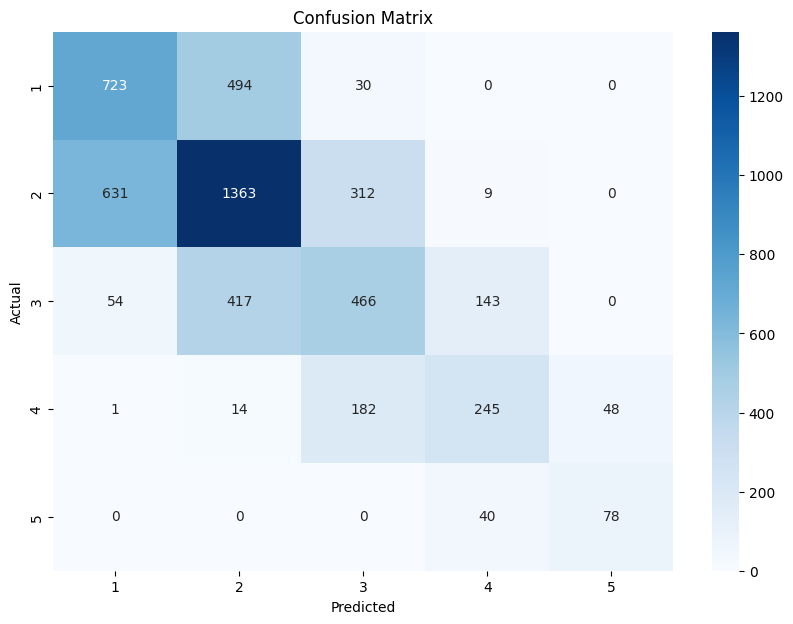

In [14]:
# Visualizar a matriz de confusão usando seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['1', '2', '3','4' ,'5'], yticklabels=['1', '2', '3','4' ,'5'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [15]:
# Visualizar a árvore de decisão
from sklearn.tree import plot_tree


plt.figure(figsize=(20,10))
plot_tree(model, feature_names=features, class_names=['1', '2', '3', '4', '5'], filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree')
plt.show()